In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df_games = pd.read_parquet('../Datasets/steam_games_preprocessed.parquet')

In [55]:
df_reviews = pd.read_parquet('../Datasets/user_reviews_preprocessed.parquet')

In [56]:
df_items = pd.read_parquet('../Datasets/users_items_preprocessed.parquet')

In [57]:
df_games.head()

,title,release_date,genres,price,item_id,developer
0,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140,Kotoshiro
1,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,643980,Secret Level SRL
2,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,670290,Poolians.com
3,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.99,767400,彼岸领域
4,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",3.99,772540,Trickjump Games Ltd


In [58]:
df_reviews.head()

,item_id,recommend,user_id,sentiment_analysis
0,1250,True,76561197970982479,2
1,22200,True,76561197970982479,2
2,43110,True,76561197970982479,2
3,251610,True,js41637,2
4,227300,True,js41637,0


In [59]:
df_items.head()

,item_name,playtime_forever,user_id,items_count
0,"Warhammer 40,000 Space Marine",5498,76561197992542501,91
1,STAR WARS™ Jedi Knight: Jedi Academy™,0,Mako-Attako,128
2,Portal 2,1047,76561198045508673,73
3,Dota 2 Test,0,76561198051256285,161
4,Tesla Effect,0,chidvd,6410


In [60]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27449 entries, 0 to 27448
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         27449 non-null  object        
 1   release_date  27449 non-null  datetime64[ns]
 2   genres        27449 non-null  object        
 3   price         27449 non-null  float32       
 4   item_id       27449 non-null  object        
 5   developer     27449 non-null  object        
dtypes: datetime64[ns](1), float32(1), object(4)
memory usage: 1.2+ MB


In [61]:
df_games.describe()

,release_date,price
count,27449,27449.000000
mean,2015-05-31 14:06:52.605195264,9.006355
min,1983-06-19 00:00:00,0.000000
25%,2014-10-30 00:00:00,2.990000
50%,2016-05-09 00:00:00,4.990000
75%,2017-04-25 00:00:00,9.990000
max,2021-12-31 00:00:00,995.000000
std,NaN,16.045633


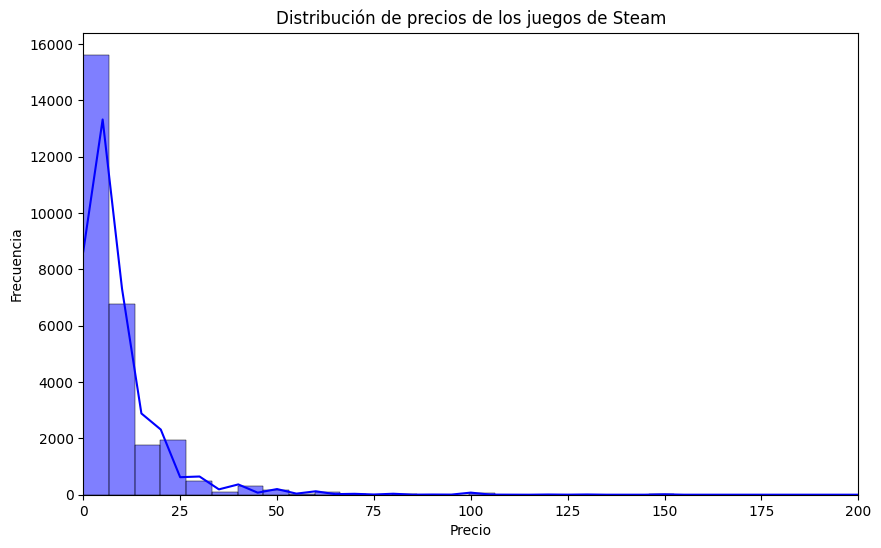

In [62]:
# Análisis de precios
plt.figure(figsize=(10,6))
sns.histplot(df_games['price'], bins=150, kde=True, color='blue')
plt.title('Distribución de precios de los juegos de Steam')
plt.xlim(0,200)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

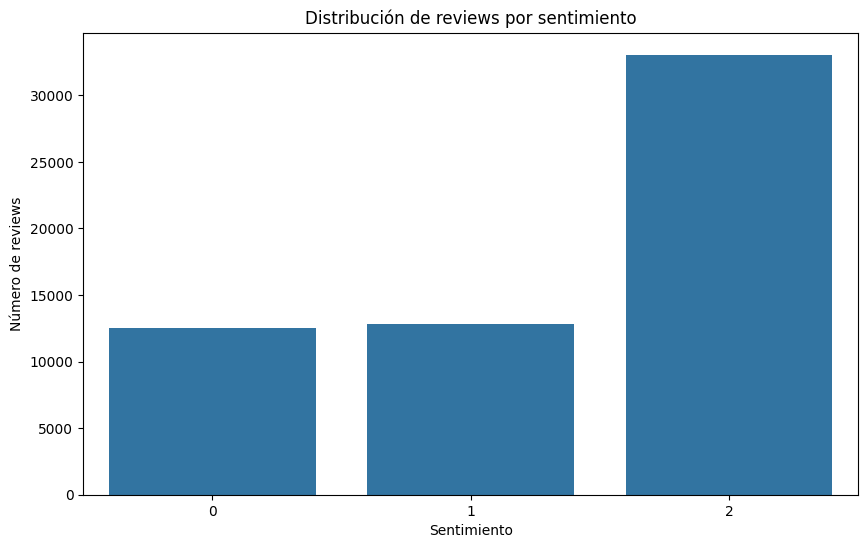

In [63]:
# Conteo de reviews por sentimiento
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribución de reviews por sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Número de reviews')
plt.show()

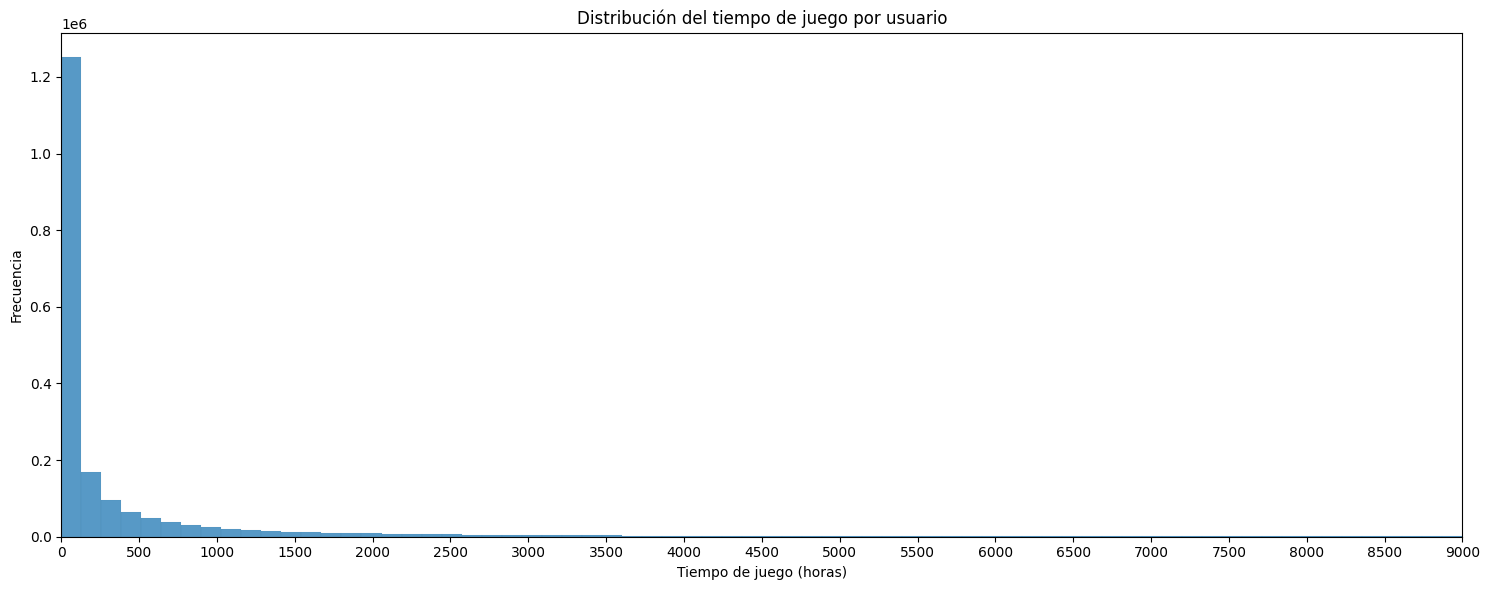

In [64]:
# Distribución del tiempo de juego
plt.figure(figsize=(15,6))
sns.histplot(df_items['playtime_forever'], bins=5000)
plt.title('Distribución del tiempo de juego por usuario')
plt.xlim(0,9000)
plt.xticks(range(0, 9001, 500))
plt.xlabel('Tiempo de juego (horas)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()